<a href="https://colab.research.google.com/github/badhanamitroy/AI_lab_Classes/blob/main/ANN_Irish_flower_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
# load dataset
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data preprocessing

In [45]:
# Removing Id Column
df = df.drop('Id', axis=1)
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
# Feature Label Split
x = df.drop('Species',axis=1)
y = df['Species']

In [47]:
# Scaling
from sklearn.preprocessing import StandardScaler, LabelBinarizer
scaled_x = StandardScaler().fit_transform(x)
encoded_y = LabelBinarizer().fit_transform(y)


#Train Test split

In [48]:
from sklearn.model_selection import train_test_split
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(scaled_x, encoded_y, test_size=0.2,random_state=42)

#Model Training


In [49]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense

model = Sequential([
    Dense(128, activation='sigmoid', input_shape=(4,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=100, batch_size=8, verbose=1)

Epoch 1/100


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.3746 - loss: 1.1571 - val_accuracy: 0.3000 - val_loss: 1.0582
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3477 - loss: 1.0548 - val_accuracy: 0.7000 - val_loss: 0.9507
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6558 - loss: 0.9560 - val_accuracy: 0.8333 - val_loss: 0.8643
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8715 - loss: 0.8411 - val_accuracy: 0.8333 - val_loss: 0.7192
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7937 - loss: 0.6996 - val_accuracy: 0.8333 - val_loss: 0.5741
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8867 - loss: 0.5904 - val_accuracy: 0.9333 - val_loss: 0.4625
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8034 - loss: 0.4860 - val_accuracy: 0.9000 - val_loss: 0.3903
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9106 - loss: 0.3919 - val_accuracy: 0.9000 - val_loss: 0.

#save the model

In [50]:
model.save('/content/drive/MyDrive/Colab Notebooks/iris_ann_model.h5')

In [51]:
train_loss, train_accuracy = model.evaluate(x_train, y_train)
test_loss, test_accuracy = model.evaluate(x_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9767 - loss: 0.0575
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 1.0000 - loss: 0.0288


In [52]:
train_accuracy, test_accuracy

(0.9833333492279053, 1.0)

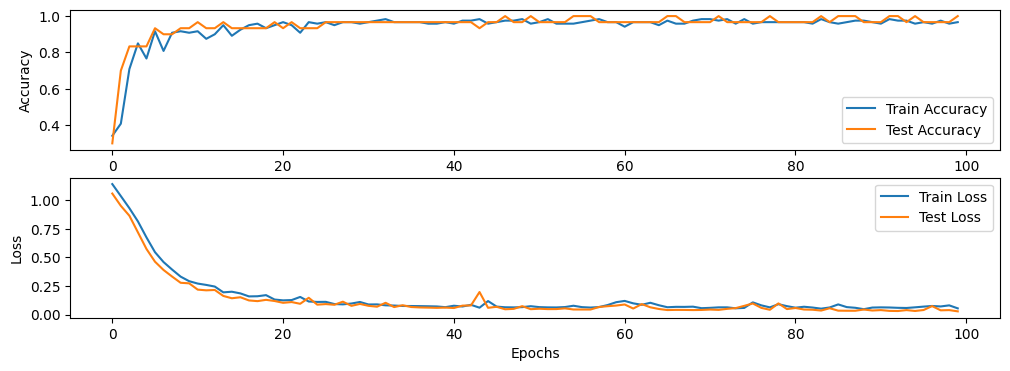

In [62]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))
plt.subplot(2, 1, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()